In [1]:
import sqlite3
import pandas as pd

In [2]:
db_path = "/Users/armaan/Desktop/wildfire_project/data/FPA_FOD_20170508.sqlite"
conn = sqlite3.connect(db_path)

In [3]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


In [4]:
df_fire = pd.read_sql("SELECT * FROM Fires;", conn)

In [5]:
# df_fire = df_fire.sample(n=100000, random_state=42)

In [6]:
df_fire.head()


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [7]:
df_fire.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [8]:
df_fire.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [9]:
df_fire.shape

(1880465, 39)

In [10]:
df_fire.describe()


,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [11]:
import numpy as np

In [12]:
usecols = [
    "FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "DISCOVERY_TIME",
    "STAT_CAUSE_CODE", "STAT_CAUSE_DESCR",
    "FIRE_SIZE", "FIRE_SIZE_CLASS",
    "LATITUDE", "LONGITUDE",
    "STATE", "COUNTY", "FIPS_NAME",
    "OWNER_DESCR"
]

df = df_fire[usecols].copy()
print("Initial shape:", df.shape)

Initial shape: (1880465, 14)


In [13]:
df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_NAME,OWNER_DESCR
0,2005,2453403.5,33,1300,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,CA,63,Plumas,USFS
1,2004,2453137.5,133,0845,1.0,Lightning,0.25,A,38.933056,-120.404444,CA,61,Placer,USFS
2,2004,2453156.5,152,1921,5.0,Debris Burning,0.10,A,38.984167,-120.735556,CA,17,El Dorado,STATE OR PRIVATE
3,2004,2453184.5,180,1600,1.0,Lightning,0.10,A,38.559167,-119.913333,CA,3,Alpine,USFS
4,2004,2453184.5,180,1600,1.0,Lightning,0.10,A,38.559167,-119.933056,CA,3,Alpine,USFS


In [14]:
df = df.dropna(subset=["LATITUDE", "LONGITUDE"])
df = df[df["FIRE_YEAR"].notna()]

print("After dropping missing geolocation/time:", df.shape)

After dropping missing geolocation/time: (1880465, 14)


In [15]:
def convert_time(val):
    try:
        val = int(val)
        hour = val // 100
        if 0 <= hour <= 23:
            return hour
        return np.nan
    except:
        return np.nan

df["DISCOVERY_HOUR"] = df["DISCOVERY_TIME"].apply(convert_time)
df = df.dropna(subset=["DISCOVERY_HOUR"])

print("After fixing discovery time:", df.shape)

After fixing discovery time: (997827, 15)


In [16]:
df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_NAME,OWNER_DESCR,DISCOVERY_HOUR
0,2005,2453403.5,33,1300,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,CA,63,Plumas,USFS,13.0
1,2004,2453137.5,133,0845,1.0,Lightning,0.25,A,38.933056,-120.404444,CA,61,Placer,USFS,8.0
2,2004,2453156.5,152,1921,5.0,Debris Burning,0.10,A,38.984167,-120.735556,CA,17,El Dorado,STATE OR PRIVATE,19.0
3,2004,2453184.5,180,1600,1.0,Lightning,0.10,A,38.559167,-119.913333,CA,3,Alpine,USFS,16.0
4,2004,2453184.5,180,1600,1.0,Lightning,0.10,A,38.559167,-119.933056,CA,3,Alpine,USFS,16.0


In [17]:
# Classes A–G represent increasing size
df["FIRE_SIZE_CLASS"] = df["FIRE_SIZE_CLASS"].astype("category")

# Binary label for large fires (C or above)
df["IS_LARGE_FIRE"] = df["FIRE_SIZE_CLASS"].apply(lambda x: 1 if x in ["C","D","E","F","G"] else 0)

df.shape


(997827, 16)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997827 entries, 0 to 1880464
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   FIRE_YEAR         997827 non-null  int64   
 1   DISCOVERY_DATE    997827 non-null  float64 
 2   DISCOVERY_DOY     997827 non-null  int64   
 3   DISCOVERY_TIME    997827 non-null  object  
 4   STAT_CAUSE_CODE   997827 non-null  float64 
 5   STAT_CAUSE_DESCR  997827 non-null  object  
 6   FIRE_SIZE         997827 non-null  float64 
 7   FIRE_SIZE_CLASS   997827 non-null  category
 8   LATITUDE          997827 non-null  float64 
 9   LONGITUDE         997827 non-null  float64 
 10  STATE             997827 non-null  object  
 11  COUNTY            660081 non-null  object  
 12  FIPS_NAME         660081 non-null  object  
 13  OWNER_DESCR       997827 non-null  object  
 14  DISCOVERY_HOUR    997827 non-null  float64 
 15  IS_LARGE_FIRE     997827 non-null  int64   
dtypes: cat

In [19]:
df["OWNER_DESCR"] = df["OWNER_DESCR"].fillna("UNKNOWN")

In [20]:
df["STAT_CAUSE_DESCR"] = df["STAT_CAUSE_DESCR"].fillna("Unknown")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997827 entries, 0 to 1880464
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   FIRE_YEAR         997827 non-null  int64   
 1   DISCOVERY_DATE    997827 non-null  float64 
 2   DISCOVERY_DOY     997827 non-null  int64   
 3   DISCOVERY_TIME    997827 non-null  object  
 4   STAT_CAUSE_CODE   997827 non-null  float64 
 5   STAT_CAUSE_DESCR  997827 non-null  object  
 6   FIRE_SIZE         997827 non-null  float64 
 7   FIRE_SIZE_CLASS   997827 non-null  category
 8   LATITUDE          997827 non-null  float64 
 9   LONGITUDE         997827 non-null  float64 
 10  STATE             997827 non-null  object  
 11  COUNTY            660081 non-null  object  
 12  FIPS_NAME         660081 non-null  object  
 13  OWNER_DESCR       997827 non-null  object  
 14  DISCOVERY_HOUR    997827 non-null  float64 
 15  IS_LARGE_FIRE     997827 non-null  int64   
dtypes: cat

In [22]:
df.describe()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_SIZE,LATITUDE,LONGITUDE,DISCOVERY_HOUR,IS_LARGE_FIRE
count,997827.000000,9.978270e+05,997827.000000,997827.000000,997827.000000,997827.000000,997827.000000,997827.000000,997827.000000
mean,2004.426276,2.453331e+06,170.892233,5.442115,121.212698,38.155731,-98.661053,14.287371,0.144505
std,7.248778,2.648112e+03,84.491999,3.445115,3382.173395,5.650188,16.157157,4.059480,0.351601
min,1992.000000,2.448622e+06,1.000000,1.000000,0.000100,17.939722,-178.802600,0.000000,0.000000
25%,1998.000000,2.451008e+06,101.000000,2.000000,0.100000,33.683694,-113.305525,12.000000,0.000000
50%,2005.000000,2.453574e+06,179.000000,5.000000,0.500000,37.216700,-95.140300,14.000000,0.000000
75%,2011.000000,2.455762e+06,230.000000,8.000000,3.000000,42.628333,-84.083228,17.000000,0.000000
max,2015.000000,2.457388e+06,366.000000,13.000000,606945.000000,70.330600,-65.256944,23.000000,1.000000


In [23]:
# df = df[df["FIRE_YEAR"] >= 1992]  

# print("After year filtering:", df.shape)

In [24]:
df = df.reset_index(drop=True)

df.head(10)

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_NAME,OWNER_DESCR,DISCOVERY_HOUR,IS_LARGE_FIRE
0,2005,2453403.5,33,1300,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,CA,63,Plumas,USFS,13.0,0
1,2004,2453137.5,133,0845,1.0,Lightning,0.25,A,38.933056,-120.404444,CA,61,Placer,USFS,8.0,0
2,2004,2453156.5,152,1921,5.0,Debris Burning,0.10,A,38.984167,-120.735556,CA,17,El Dorado,STATE OR PRIVATE,19.0,0
3,2004,2453184.5,180,1600,1.0,Lightning,0.10,A,38.559167,-119.913333,CA,3,Alpine,USFS,16.0,0
4,2004,2453184.5,180,1600,1.0,Lightning,0.10,A,38.559167,-119.933056,CA,3,Alpine,USFS,16.0,0
5,2004,2453186.5,182,1800,1.0,Lightning,0.10,A,38.635278,-120.103611,CA,5,Amador,USFS,18.0,0
6,2004,2453187.5,183,1800,1.0,Lightning,0.10,A,38.688333,-120.153333,CA,17,El Dorado,USFS,18.0,0
7,2005,2453437.5,67,1300,5.0,Debris Burning,0.80,B,40.968056,-122.433889,CA,None,None,STATE OR PRIVATE,13.0,0
8,2005,2453444.5,74,1200,5.0,Debris Burning,1.00,B,41.233611,-122.283333,CA,None,None,STATE OR PRIVATE,12.0,0
9,2004,2453187.5,183,1800,1.0,Lightning,0.10,A,38.548333,-120.149167,CA,5,Amador,USFS,18.0,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [26]:
categorical_cols = ["STAT_CAUSE_DESCR", "STATE", "OWNER_DESCR", "FIRE_SIZE_CLASS"]

encoders = {}

for col in categorical_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col].astype(str))
    encoders[col] = enc

In [27]:
df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_NAME,OWNER_DESCR,DISCOVERY_HOUR,IS_LARGE_FIRE
0,2005,2453403.5,33,1300,9.0,7,0.10,0,40.036944,-121.005833,4,63,Plumas,15,13.0,0
1,2004,2453137.5,133,0845,1.0,6,0.25,0,38.933056,-120.404444,4,61,Placer,15,8.0,0
2,2004,2453156.5,152,1921,5.0,3,0.10,0,38.984167,-120.735556,4,17,El Dorado,12,19.0,0
3,2004,2453184.5,180,1600,1.0,6,0.10,0,38.559167,-119.913333,4,3,Alpine,15,16.0,0
4,2004,2453184.5,180,1600,1.0,6,0.10,0,38.559167,-119.933056,4,3,Alpine,15,16.0,0


In [28]:
feature_cols = [
    "FIRE_YEAR",
    "DISCOVERY_DOY",
    "DISCOVERY_HOUR",
    "STAT_CAUSE_DESCR",
    "LATITUDE",
    "LONGITUDE",
    "STATE",
    "OWNER_DESCR"
]

target_col = "IS_LARGE_FIRE"

X = df[feature_cols]
y = df[target_col]


In [29]:
train = df[df["FIRE_YEAR"] <= 2010]
test  = df[df["FIRE_YEAR"] > 2010]

X_train = train[feature_cols]
y_train = train[target_col]

X_test = test[feature_cols]
y_test = test[target_col]


In [30]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred = rf.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    252402
           1       0.47      0.12      0.19     39924

    accuracy                           0.86    292326
   macro avg       0.67      0.55      0.55    292326
weighted avg       0.82      0.86      0.82    292326



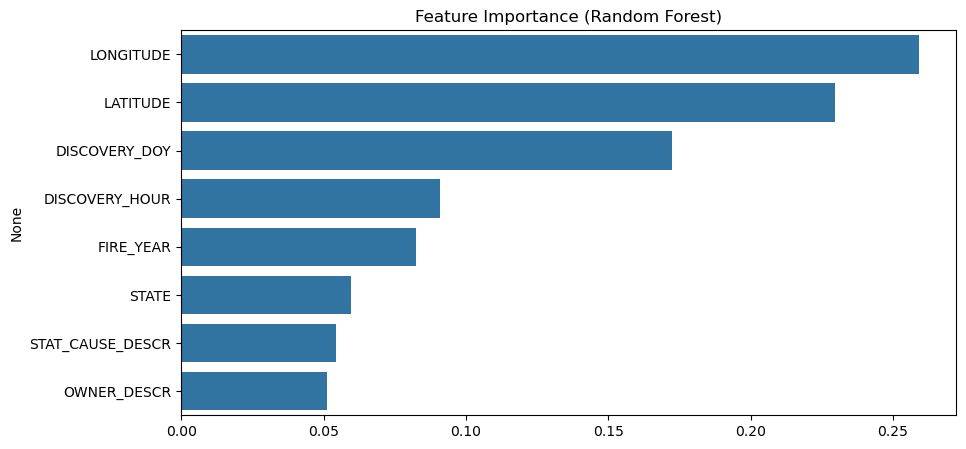

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [33]:
train = df[df["FIRE_YEAR"] <= 2010]
test  = df[df["FIRE_YEAR"] > 2010]

X_train = train[feature_cols]
y_train = train[target_col]

X_test = test[feature_cols]
y_test = test[target_col]

print("Train before SMOTE:", X_train.shape, y_train.shape)

Train before SMOTE: (705501, 8) (705501,)


In [34]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Train after SMOTE:", X_train_res.shape, y_train_res.shape)
print("Test (unchanged):", X_test.shape, y_test.shape)

Train after SMOTE: (1202468, 8) (1202468,)
Test (unchanged): (292326, 8) (292326,)


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    # scale_pos_weight=4   # helps detect large fires
)

xgb.fit(X_train_res, y_train_res)

y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("=== XGBoost (default threshold 0.5) ===")
print(classification_report(y_test, y_pred))

=== XGBoost (default threshold 0.5) ===
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    252402
           1       0.40      0.27      0.32     39924

    accuracy                           0.84    292326
   macro avg       0.64      0.60      0.62    292326
weighted avg       0.82      0.84      0.83    292326



In [36]:
from sklearn.metrics import precision_recall_curve
import numpy as np

prec, rec, thr = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (prec * rec) / (prec + rec + 1e-9)

best_idx = np.argmax(f1_scores)
best_threshold = thr[best_idx]

print("Best threshold:", best_threshold)
print("Best F1 score:", f1_scores[best_idx])

Best threshold: 0.27143607
Best F1 score: 0.3941366183295533


In [37]:
y_opt = (y_proba >= best_threshold).astype(int)

print("=== Threshold-Optimized Classification Report ===")
print(classification_report(y_test, y_opt))

=== Threshold-Optimized Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.77      0.84    252402
           1       0.29      0.60      0.39     39924

    accuracy                           0.75    292326
   macro avg       0.61      0.68      0.62    292326
weighted avg       0.84      0.75      0.78    292326



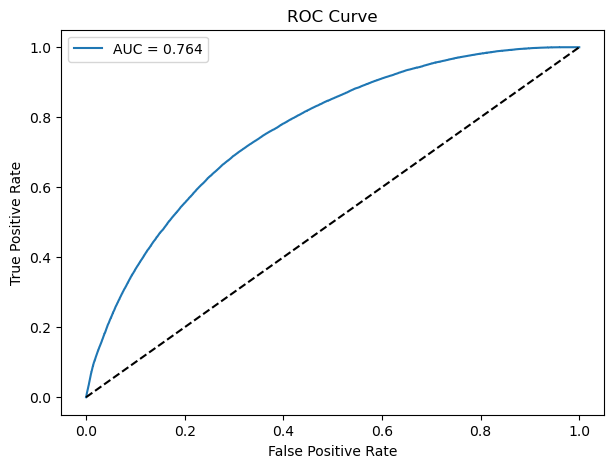

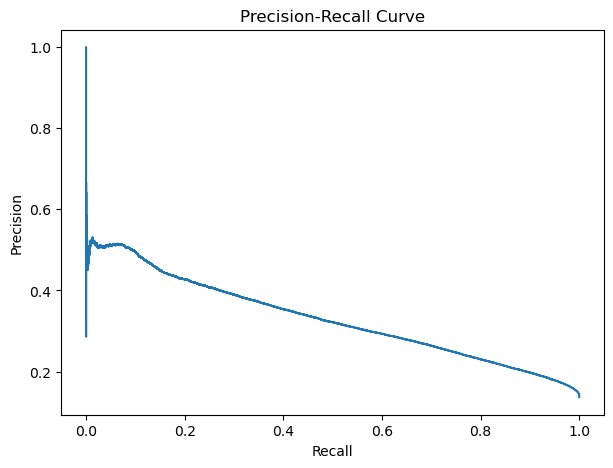

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(7,5))
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [39]:
df["FIRE_DATE"] = pd.to_datetime(df["FIRE_YEAR"].astype(str), format="%Y") \
                  + pd.to_timedelta(df["DISCOVERY_DOY"] - 1, unit="D")

df[["FIRE_YEAR", "DISCOVERY_DOY", "FIRE_DATE"]].head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_DATE
0,2005,33,2005-02-02
1,2004,133,2004-05-12
2,2004,152,2004-05-31
3,2004,180,2004-06-28
4,2004,180,2004-06-28


In [40]:
df_sub = df[(df["FIRE_YEAR"] >= 2005) & (df["FIRE_YEAR"] <= 2015)].copy()
print(df_sub["FIRE_YEAR"].describe())
print("Original subset shape:", df_sub.shape)


count    518684.000000
mean       2010.576951
std           3.086698
min        2005.000000
25%        2008.000000
50%        2011.000000
75%        2013.000000
max        2015.000000
Name: FIRE_YEAR, dtype: float64
Original subset shape: (518684, 17)


In [41]:
TARGET_N = 100000
if len(df_sub) > TARGET_N:
    df_sub = df_sub.sample(n=TARGET_N, random_state=42).copy()
print("After sampling fires:", df_sub.shape)

After sampling fires: (100000, 17)


In [42]:
df_sub["LAT_ROUND"] = df_sub["LATITUDE"].round(1)
df_sub["LON_ROUND"] = df_sub["LONGITUDE"].round(1)


In [43]:
df_sub["DATE_ROUND"] = (
    df_sub["FIRE_DATE"] - pd.to_timedelta(df_sub["FIRE_DATE"].dt.dayofyear % 3, unit="D")
).dt.floor("D")


In [44]:
df_sub["NASA_KEY"] = (
    df_sub["LAT_ROUND"].astype(str)
    + "_"
    + df_sub["LON_ROUND"].astype(str)
    + "_"
    + df_sub["DATE_ROUND"].dt.strftime("%Y%m%d")
)

In [45]:
import requests
from functools import lru_cache

@lru_cache(maxsize=100000)
def fetch_nasa_power(lat, lon, date_str):
    """
    lat, lon: rounded floats
    date_str: 'YYYYMMDD' 
    returns: dict with temperature, humidity, wind, or None if failed
    """
    base_url = "https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "parameters": "T2M,RH2M,WS10M",
        "community": "AG",
        "longitude": lon,
        "latitude": lat,
        "start": date_str,
        "end": date_str,
        "format": "JSON"
    }
    try:
        r = requests.get(base_url, params=params, timeout=10)
        r.raise_for_status()
        data = r.json()["properties"]["parameter"]
        return {
            "TEMP_2M": list(data["T2M"].values())[0],
            "RH_2M": list(data["RH2M"].values())[0],
            "WS10M": list(data["WS10M"].values())[0]
        }
    except Exception as e:
        return {"TEMP_2M": None, "RH_2M": None, "WS10M": None}

In [46]:
import os
from tqdm import tqdm

unique_keys = df_sub[["NASA_KEY", "LAT_ROUND", "LON_ROUND", "DATE_ROUND"]].drop_duplicates()
print("Unique keys total:", len(unique_keys))


Unique keys total: 95828


In [47]:
# Cap the number of unique NASA queries to something manageable
MAX_KEYS = 20000 

if len(unique_keys) > MAX_KEYS:
    unique_keys = unique_keys.sample(n=MAX_KEYS, random_state=42).reset_index(drop=True)
    print("Unique keys after capping:", len(unique_keys))
else:
    print("Unique keys below cap, using all.")


Unique keys after capping: 20000


In [48]:
cache_path = "/Users/armaan/Desktop/wildfire_project/data/nasa_weather_cache.csv"

# Load existing cache if it exists, otherwise create empty DataFrame
if os.path.exists(cache_path):
    df_weather_nasa = pd.read_csv(cache_path)
    print("Loaded existing NASA cache:", df_weather_nasa.shape)
else:
    df_weather_nasa = pd.DataFrame(columns=["NASA_KEY", "TEMP_2M", "RH_2M", "WS10M"])
    print("No existing NASA cache found. Starting fresh.")

# Figure out which keys still need to be fetched
already_have = set(df_weather_nasa["NASA_KEY"].unique())
pending = unique_keys[~unique_keys["NASA_KEY"].isin(already_have)].reset_index(drop=True)

print("Keys already cached:", len(already_have))
print("Keys still to fetch:", len(pending))

Loaded existing NASA cache: (20000, 4)
Keys already cached: 20000
Keys still to fetch: 0


In [49]:
# Fetch in batches
BATCH_SIZE = 1000 

new_records = []

for start in range(0, len(pending), BATCH_SIZE):
    batch = pending.iloc[start:start + BATCH_SIZE]
    print(f"\nFetching batch {start}–{start + len(batch) - 1} of {len(pending)}")

    for _, row in tqdm(batch.iterrows(), total=len(batch)):
        k = row["NASA_KEY"]
        lat = row["LAT_ROUND"]
        lon = row["LON_ROUND"]
        date_str = row["DATE_ROUND"].strftime("%Y%m%d")

        weather = fetch_nasa_power(lat, lon, date_str)
        weather["NASA_KEY"] = k
        new_records.append(weather)

    # After each batch, append to cache and save to disk
    if new_records:
        df_new = pd.DataFrame(new_records)
        df_weather_nasa = pd.concat([df_weather_nasa, df_new], ignore_index=True)

        # Drop any accidental duplicates
        df_weather_nasa = df_weather_nasa.drop_duplicates(subset="NASA_KEY")

        # Save to CSV so you can resume later
        df_weather_nasa.to_csv(cache_path, index=False)
        print("Cache updated:", df_weather_nasa.shape)

        # Clear batch list
        new_records = []

print("\nFinal NASA weather cache shape:", df_weather_nasa.shape)


Final NASA weather cache shape: (20000, 4)


In [50]:
# Merge back to df_sub
df_sub = df_sub.merge(df_weather_nasa, on="NASA_KEY", how="left")
print("df_sub after weather merge:", df_sub.shape)

df_sub after weather merge: (100000, 24)


In [51]:
print("Final cache:", df_weather_nasa.shape)
print("df_sub after merge:", df_sub.shape)
print(df_sub[["TEMP_2M", "RH_2M", "WS10M"]].notna().mean())


Final cache: (20000, 4)
df_sub after merge: (100000, 24)
TEMP_2M    0.20887
RH_2M      0.20887
WS10M      0.20887
dtype: float64


In [52]:
df_sub[["TEMP_2M", "RH_2M", "WS10M"]].describe()

,TEMP_2M,RH_2M,WS10M
count,20887.000000,20887.000000,20887.000000
mean,16.119052,60.527553,3.054649
std,8.750452,18.979233,1.566170
min,-20.990000,4.080000,0.540000
25%,9.640000,46.770000,1.960000
50%,16.740000,63.890000,2.640000
75%,22.900000,75.570000,3.700000
max,39.100000,99.810000,15.060000


In [53]:
df_model = df_sub.dropna(subset=["TEMP_2M", "RH_2M", "WS10M"]).copy()
print(df_model.shape)
print(df_model.describe())
df_model.head()

(20887, 24)
          FIRE_YEAR  DISCOVERY_DATE  DISCOVERY_DOY  STAT_CAUSE_CODE  \
count  20887.000000    2.088700e+04   20887.000000     20887.000000   
mean    2010.586872    2.455580e+06     169.732752         5.913822   
min     2005.000000    2.453372e+06       1.000000         1.000000   
25%     2008.000000    2.454648e+06     100.000000         2.000000   
50%     2011.000000    2.455734e+06     176.000000         5.000000   
75%     2013.000000    2.456506e+06     229.000000         9.000000   
max     2015.000000    2.457386e+06     365.000000        13.000000   
std        3.098298    1.131702e+03      84.792584         3.606633   

       STAT_CAUSE_DESCR      FIRE_SIZE  FIRE_SIZE_CLASS      LATITUDE  \
count      20887.000000   20887.000000     20887.000000  20887.000000   
mean           4.672524     141.403793         0.793747     38.522277   
min            0.000000       0.001000         0.000000     17.974269   
25%            3.000000       0.100000         0.000000 

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,...,DISCOVERY_HOUR,IS_LARGE_FIRE,FIRE_DATE,LAT_ROUND,LON_ROUND,DATE_ROUND,NASA_KEY,TEMP_2M,RH_2M,WS10M
8,2013,2456466.5,174,0229,9.0,7,0.10,0,39.371700,-104.854100,...,2.0,0,2013-06-23,39.4,-104.9,2013-06-23,39.4_-104.9_20130623,19.55,34.87,3.49
39,2013,2456466.5,174,1320,7.0,0,0.50,1,41.054700,-123.683100,...,13.0,0,2013-06-23,41.1,-123.7,2013-06-23,41.1_-123.7_20130623,13.85,84.55,1.91
53,2010,2455408.5,212,1045,2.0,4,0.25,0,33.569444,-116.683333,...,10.0,0,2010-07-31,33.6,-116.7,2010-07-29,33.6_-116.7_20100729,23.67,35.35,2.20
54,2012,2456282.5,356,1313,8.0,2,0.10,0,33.921997,-117.261244,...,13.0,0,2012-12-21,33.9,-117.3,2012-12-19,33.9_-117.3_20121219,4.26,42.56,3.86
70,2011,2455802.5,241,0824,1.0,6,0.10,0,45.132500,-116.479444,...,8.0,0,2011-08-29,45.1,-116.5,2011-08-28,45.1_-116.5_20110828,22.22,41.79,1.58


In [54]:
df_model = df_sub.dropna(subset=["TEMP_2M", "RH_2M", "WS10M"]).copy()

print(df_model.shape)
print(df_model["FIRE_SIZE_CLASS"].value_counts())


(20887, 24)
FIRE_SIZE_CLASS
1    9077
0    8794
2    2250
3     355
4     206
5     117
6      88
Name: count, dtype: int64


In [55]:
feature_cols = [
    # "FIRE_YEAR",
    "DISCOVERY_DOY",
    "DISCOVERY_HOUR",
    "LATITUDE",
    "LONGITUDE",
    "STAT_CAUSE_CODE",   
    # NASA features:
    "TEMP_2M",
    "RH_2M",
    "WS10M"
]

target_col = "IS_LARGE_FIRE"


In [56]:
X = df_model[feature_cols]
y = df_model[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [57]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [58]:
y_pred = model.predict(X_test)
print("=== Hold-out (no SMOTE) ===")
print(classification_report(y_test, y_pred))

=== Hold-out (no SMOTE) ===
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4468
           1       0.54      0.07      0.13       754

    accuracy                           0.86      5222
   macro avg       0.70      0.53      0.53      5222
weighted avg       0.82      0.86      0.81      5222



In [59]:
# Get prediction probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Precision–Recall curve values
prec, rec, thr = precision_recall_curve(y_test, y_proba)

# Avoid division errors
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-9)

# Best threshold = index of max F1
best_idx = np.argmax(f1_scores)
best_threshold = thr[best_idx]

print("Best threshold:", best_threshold)
print("Best F1 score:", f1_scores[best_idx])

# Apply threshold
y_opt = (y_proba >= best_threshold).astype(int)

print("\n=== Threshold-Optimized Performance ===")
print(classification_report(y_test, y_opt))


Best threshold: 0.18650064
Best F1 score: 0.4175724633183696

=== Threshold-Optimized Performance ===
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4468
           1       0.32      0.61      0.42       754

    accuracy                           0.75      5222
   macro avg       0.62      0.69      0.63      5222
weighted avg       0.83      0.75      0.78      5222



In [60]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

smote = SMOTE(random_state=42)

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ("smote", smote),
    ("model", xgb)
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 for the positive (large fire) class
f1_scores = cross_val_score(
    pipeline, X, y,
    scoring="f1",
    cv=kfold
)

# Macro F1 (both classes)
f1_macro_scores = cross_val_score(
    pipeline, X, y,
    scoring="f1_macro",
    cv=kfold
)

print("\n=== SMOTE + XGBoost (5-fold CV) ===")
print("F1 (class 1) scores:", f1_scores)
print("Mean F1 (class 1):", np.mean(f1_scores))

print("\nMacro F1 scores:", f1_macro_scores)
print("Mean Macro F1:", np.mean(f1_macro_scores))


=== SMOTE + XGBoost (5-fold CV) ===
F1 (class 1) scores: [0.32264736 0.27201784 0.27118644 0.30546265 0.31125131]
Mean F1 (class 1): 0.29651312171722133

Macro F1 scores: [0.61700104 0.59223629 0.58916947 0.6109585  0.61138684]
Mean Macro F1: 0.604150426833794


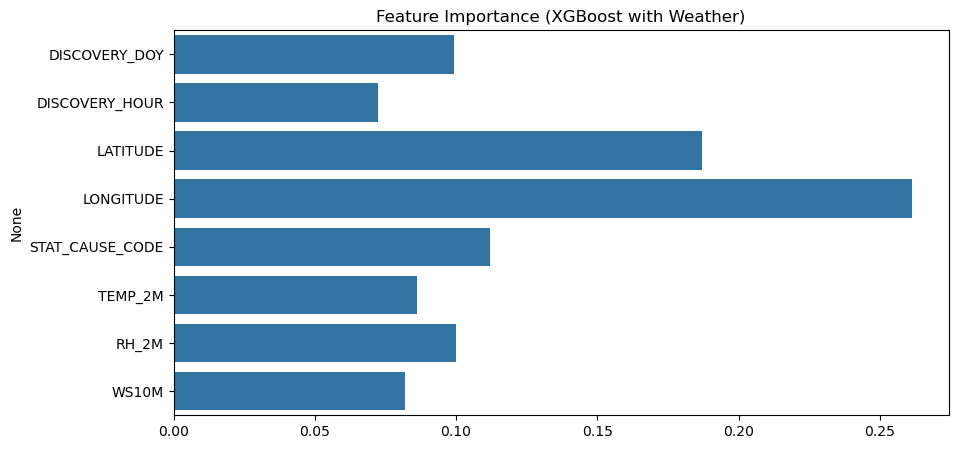

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the model
feat_imp = model.feature_importances_
feat_names = X_train.columns

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp, y=feat_names)
plt.title("Feature Importance (XGBoost with Weather)")
plt.show()


In [62]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
usdm_path = "/Users/armaan/Desktop/wildfire_project/data/dm_export_20050101_20151231.csv"   
df_usdm = pd.read_csv(usdm_path)

In [64]:
df_usdm.head()

,MapDate,StateAbbreviation,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20151229,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-29,2016-01-04,2
1,20151222,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-22,2015-12-28,2
2,20151215,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-15,2015-12-21,2
3,20151208,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-08,2015-12-14,2
4,20151201,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-01,2015-12-07,2


In [65]:
df_usdm = df_usdm.rename(columns={
    "StateAbbreviation": "STATE",
    "MapDate": "VALID_DATE",
    "None": "PCT_NO_DROUGHT",
    "D0": "PCT_D0",
    "D1": "PCT_D1",
    "D2": "PCT_D2",
    "D3": "PCT_D3",
    "D4": "PCT_D4"
})

df_usdm.head()

,VALID_DATE,STATE,PCT_NO_DROUGHT,PCT_D0,PCT_D1,PCT_D2,PCT_D3,PCT_D4,ValidStart,ValidEnd,StatisticFormatID
0,20151229,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-29,2016-01-04,2
1,20151222,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-22,2015-12-28,2
2,20151215,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-15,2015-12-21,2
3,20151208,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-08,2015-12-14,2
4,20151201,AK,89.79,10.21,0.0,0.0,0.0,0.0,2015-12-01,2015-12-07,2


In [66]:
df_usdm["VALID_DATE"] = pd.to_datetime(df_usdm["VALID_DATE"], format="%Y%m%d")

df_usdm.shape

(29900, 11)

In [67]:
# Highest drought level with > 0% area
def compute_drought_max(row):
    levels = ["PCT_D0", "PCT_D1", "PCT_D2", "PCT_D3", "PCT_D4"]
    for i, col in reversed(list(enumerate(levels))):  # Check D4 → D0
        if row[col] > 0:
            return i
    return 0  # no drought

df_usdm["DROUGHT_MAX_LEVEL"] = df_usdm.apply(compute_drought_max, axis=1)

df_usdm.shape

(29900, 12)

In [68]:
df_usdm.describe()

,VALID_DATE,PCT_NO_DROUGHT,PCT_D0,PCT_D1,PCT_D2,PCT_D3,PCT_D4,StatisticFormatID,DROUGHT_MAX_LEVEL
count,29900,29900.000000,29900.000000,29900.000000,29900.000000,29900.000000,29900.000000,29900.0,29900.000000
mean,2010-06-29 00:00:00.000000256,61.738622,17.290496,10.329083,6.428890,3.109441,1.103503,2.0,1.117659
min,2004-12-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000
25%,2007-09-25 00:00:00,26.060000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000
50%,2010-06-29 00:00:00,72.790000,11.035000,0.245000,0.000000,0.000000,0.000000,2.0,1.000000
75%,2013-04-02 00:00:00,100.000000,27.360000,16.480000,6.030000,0.000000,0.000000,2.0,2.000000
max,2015-12-29 00:00:00,100.000000,100.000000,100.000000,100.000000,87.720000,87.990000,2.0,4.000000
std,NaN,37.534997,20.211683,16.102404,13.186886,9.290932,6.273291,0.0,1.318581


In [69]:
# Percent area in severe drought or worse
df_usdm["DROUGHT_D2_PLUS"] = (
    df_usdm["PCT_D2"] + df_usdm["PCT_D3"] + df_usdm["PCT_D4"]
)

In [70]:
keep_cols = ["STATE", "VALID_DATE", "PCT_D0", "PCT_D1", "PCT_D2", "PCT_D3", "PCT_D4",
             "DROUGHT_MAX_LEVEL", "DROUGHT_D2_PLUS"]
df_usdm = df_usdm[keep_cols]

In [71]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20887 entries, 8 to 99999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRE_YEAR         20887 non-null  int64         
 1   DISCOVERY_DATE    20887 non-null  float64       
 2   DISCOVERY_DOY     20887 non-null  int64         
 3   DISCOVERY_TIME    20887 non-null  object        
 4   STAT_CAUSE_CODE   20887 non-null  float64       
 5   STAT_CAUSE_DESCR  20887 non-null  int64         
 6   FIRE_SIZE         20887 non-null  float64       
 7   FIRE_SIZE_CLASS   20887 non-null  int64         
 8   LATITUDE          20887 non-null  float64       
 9   LONGITUDE         20887 non-null  float64       
 10  STATE             20887 non-null  int64         
 11  COUNTY            16661 non-null  object        
 12  FIPS_NAME         16661 non-null  object        
 13  OWNER_DESCR       20887 non-null  int64         
 14  DISCOVERY_HOUR    20887 non

In [72]:
df_model["STATE"] = encoders["STATE"].inverse_transform(df_model["STATE"])

In [73]:
df_model["STATE"] = df_model["STATE"].astype(str).str.upper()
df_usdm["STATE"] = df_usdm["STATE"].astype(str).str.upper()

In [74]:
df_model["FIRE_DATE"]  = pd.to_datetime(df_model["FIRE_DATE"])
df_usdm["VALID_DATE"]  = pd.to_datetime(df_usdm["VALID_DATE"])

In [75]:
df_model_sorted = df_model.sort_values(["STATE", "FIRE_DATE"]).reset_index(drop=True)
df_usdm_sorted  = df_usdm.sort_values(["STATE", "VALID_DATE"]).reset_index(drop=True)


In [76]:
print(df_model_sorted[["STATE", "FIRE_DATE"]].head(10))
print(df_usdm_sorted[["STATE", "VALID_DATE"]].head(10))


  STATE  FIRE_DATE
0    AK 2005-05-08
1    AK 2005-05-30
2    AK 2005-06-06
3    AK 2005-06-10
4    AK 2005-06-14
5    AK 2005-06-16
6    AK 2005-06-17
7    AK 2005-06-17
8    AK 2005-06-17
9    AK 2005-06-19
  STATE VALID_DATE
0    AK 2004-12-28
1    AK 2005-01-04
2    AK 2005-01-11
3    AK 2005-01-18
4    AK 2005-01-25
5    AK 2005-02-01
6    AK 2005-02-08
7    AK 2005-02-15
8    AK 2005-02-22
9    AK 2005-03-01


In [77]:
import pandas as pd

merged_list = []

# Loop over states present in your fire dataset
for st, fire_sub in df_model.groupby("STATE"):
    # Subset the drought data for this state
    drought_sub = df_usdm[df_usdm["STATE"] == st]
    
    if drought_sub.empty:
        # No drought data for this state – skip or handle separately
        continue
    
    # Sort both subsets by their date keys
    fire_sub = fire_sub.sort_values("FIRE_DATE")
    drought_sub = drought_sub.sort_values("VALID_DATE")
    
    # As-of merge within this state only
    merged_sub = pd.merge_asof(
        fire_sub,
        drought_sub,
        left_on="FIRE_DATE",
        right_on="VALID_DATE",
        direction="backward",
        tolerance=pd.Timedelta("30D")  
    )
    
    merged_list.append(merged_sub)

# Concatenate all states back together
df_merged = pd.concat(merged_list, ignore_index=True)

print("Merged shape:", df_merged.shape)


Merged shape: (20887, 33)


In [78]:
df_merged = df_merged.dropna(subset=["DROUGHT_MAX_LEVEL"]).reset_index(drop=True)
print("After dropping missing drought:", df_merged.shape)


After dropping missing drought: (20887, 33)


In [79]:
df_merged.columns.tolist()


['FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'STATE_x',
 'COUNTY',
 'FIPS_NAME',
 'OWNER_DESCR',
 'DISCOVERY_HOUR',
 'IS_LARGE_FIRE',
 'FIRE_DATE',
 'LAT_ROUND',
 'LON_ROUND',
 'DATE_ROUND',
 'NASA_KEY',
 'TEMP_2M',
 'RH_2M',
 'WS10M',
 'STATE_y',
 'VALID_DATE',
 'PCT_D0',
 'PCT_D1',
 'PCT_D2',
 'PCT_D3',
 'PCT_D4',
 'DROUGHT_MAX_LEVEL',
 'DROUGHT_D2_PLUS']

In [80]:
print((df_merged["STATE_x"] == df_merged["STATE_y"]).all())

True


In [81]:
df_merged["STATE"] = df_merged["STATE_x"]

df_merged = df_merged.drop(columns=["STATE_x", "STATE_y"])


In [82]:
df_merged[["STATE", "FIRE_DATE", "VALID_DATE",
           "PCT_D0", "PCT_D1", "PCT_D2", "PCT_D3", "PCT_D4",
           "DROUGHT_MAX_LEVEL", "DROUGHT_D2_PLUS"]].head()

,STATE,FIRE_DATE,VALID_DATE,PCT_D0,PCT_D1,PCT_D2,PCT_D3,PCT_D4,DROUGHT_MAX_LEVEL,DROUGHT_D2_PLUS
0,AK,2005-05-08,2005-05-03,0.0,0.0,0.0,0.0,0.0,0,0.0
1,AK,2005-05-30,2005-05-24,0.0,0.0,0.0,0.0,0.0,0,0.0
2,AK,2005-06-06,2005-05-31,0.0,0.0,0.0,0.0,0.0,0,0.0
3,AK,2005-06-10,2005-06-07,0.0,0.0,0.0,0.0,0.0,0,0.0
4,AK,2005-06-14,2005-06-14,0.0,0.0,0.0,0.0,0.0,0,0.0


In [83]:
df_merged[df_merged["STATE"] == "CA"].head()


,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,...,WS10M,VALID_DATE,PCT_D0,PCT_D1,PCT_D2,PCT_D3,PCT_D4,DROUGHT_MAX_LEVEL,DROUGHT_D2_PLUS,STATE
2212,2005,2453391.5,21,0900,9.0,7,0.10,0,37.295005,-120.733200,...,0.79,2005-01-18,7.53,3.88,0.21,0.0,0.0,2,0.21,CA
2213,2005,2453391.5,21,1249,7.0,0,0.50,1,38.850586,-120.860517,...,2.38,2005-01-18,7.53,3.88,0.21,0.0,0.0,2,0.21,CA
2214,2005,2453406.5,36,1300,4.0,1,0.10,0,40.985000,-122.417778,...,2.42,2005-02-01,6.98,4.10,0.00,0.0,0.0,1,0.00,CA
2215,2005,2453436.5,66,1400,5.0,3,0.25,0,41.108333,-123.075000,...,1.36,2005-03-01,8.38,1.22,0.00,0.0,0.0,1,0.00,CA
2216,2005,2453446.5,76,1830,9.0,7,0.10,0,41.211389,-123.655833,...,1.71,2005-03-15,9.03,2.79,0.21,0.0,0.0,2,0.21,CA


In [84]:
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [85]:
size_labels = encoders["FIRE_SIZE_CLASS"].inverse_transform(df_merged["FIRE_SIZE_CLASS"])
df_merged["FIRE_SIZE_CLASS_STR"] = size_labels

In [86]:
size_order = ["A", "B", "C", "D", "E", "F", "G"]
df_mc = df_merged[df_merged["FIRE_SIZE_CLASS_STR"].isin(size_order)].copy()

In [87]:
cat_type = CategoricalDtype(categories=size_order, ordered=True)
df_mc["FIRE_SIZE_CLASS_STR"] = df_mc["FIRE_SIZE_CLASS_STR"].astype(cat_type)

In [88]:
y = df_mc["FIRE_SIZE_CLASS_STR"].cat.codes

print("Class distribution (codes 0–6):")
print(y.value_counts().sort_index())
print(dict(enumerate(size_order)))

Class distribution (codes 0–6):
0    8794
1    9077
2    2250
3     355
4     206
5     117
6      88
Name: count, dtype: int64
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}


In [89]:
feature_cols = [
    "FIRE_YEAR",
    "DISCOVERY_DOY",
    "DISCOVERY_HOUR",
    "LATITUDE",
    "LONGITUDE",
    "STAT_CAUSE_CODE",
    # NASA weather
    "TEMP_2M",
    "RH_2M",
    "WS10M",
    # Drought features
    "DROUGHT_MAX_LEVEL",
    "DROUGHT_D2_PLUS",
]

X = df_mc[feature_cols].copy()

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (20887, 11)
y shape: (20887,)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train class distribution:", np.bincount(y_train))
print("Test class distribution:", np.bincount(y_test))


Train size: (15665, 11) Test size: (5222, 11)
Train class distribution: [6595 6808 1687  266  155   88   66]
Test class distribution: [2199 2269  563   89   51   29   22]


In [91]:
n_classes = len(size_order)

xgb_multi = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=n_classes,
    random_state=42,
    n_jobs=-1
)

xgb_multi.fit(X_train, y_train)

y_pred = xgb_multi.predict(X_test)

print("\n=== Baseline Multi-Class XGBoost (no SMOTE) ===")
print(classification_report(y_test, y_pred, target_names=size_order))

print("Confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_test, y_pred))



=== Baseline Multi-Class XGBoost (no SMOTE) ===
              precision    recall  f1-score   support

           A       0.66      0.75      0.70      2199
           B       0.59      0.68      0.63      2269
           C       0.33      0.07      0.11       563
           D       0.00      0.00      0.00        89
           E       0.00      0.00      0.00        51
           F       0.00      0.00      0.00        29
           G       0.00      0.00      0.00        22

    accuracy                           0.62      5222
   macro avg       0.23      0.21      0.21      5222
weighted avg       0.57      0.62      0.58      5222

Confusion matrix (rows=true, cols=pred):
[[1639  546   10    1    0    0    3]
 [ 668 1544   56    0    0    1    0]
 [  97  425   39    1    1    0    0]
 [  20   61    8    0    0    0    0]
 [  22   26    3    0    0    0    0]
 [  15   12    0    1    0    0    1]
 [  11    8    1    0    0    2    0]]


In [92]:
smote_mc = SMOTE(random_state=42)

xgb_multi_smote = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=n_classes,
    random_state=42,
    n_jobs=-1
)

pipeline_mc = Pipeline([
    ("smote", smote_mc),
    ("model", xgb_multi_smote),
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Macro F1 across classes A–G (treats all classes equally)
f1_macro_scores = cross_val_score(
    pipeline_mc, X, y,
    scoring="f1_macro",
    cv=kfold
)

print("\n=== SMOTE + XGBoost (5-fold CV) ===")
print("Macro F1 scores:", f1_macro_scores)
print("Mean Macro F1:", np.mean(f1_macro_scores))



=== SMOTE + XGBoost (5-fold CV) ===
Macro F1 scores: [0.25170329 0.25785217 0.24545098 0.26481458 0.24341572]
Mean Macro F1: 0.2526473479741313


In [93]:
pipeline_mc.fit(X_train, y_train)

y_pred_smote = pipeline_mc.predict(X_test)

print("\n=== Final Model (SMOTE + XGB on train, evaluated on test) ===")
print(classification_report(y_test, y_pred_smote, target_names=size_order))

cm = confusion_matrix(y_test, y_pred_smote)
print("Confusion matrix (rows=true, cols=pred):")
print(cm)



=== Final Model (SMOTE + XGB on train, evaluated on test) ===
              precision    recall  f1-score   support

           A       0.68      0.73      0.70      2199
           B       0.60      0.65      0.62      2269
           C       0.32      0.13      0.19       563
           D       0.13      0.06      0.08        89
           E       0.05      0.04      0.04        51
           F       0.04      0.07      0.05        29
           G       0.05      0.09      0.06        22

    accuracy                           0.60      5222
   macro avg       0.27      0.25      0.25      5222
weighted avg       0.58      0.60      0.59      5222

Confusion matrix (rows=true, cols=pred):
[[1601  518   26    9   12   11   22]
 [ 622 1472  118   14   12   20   11]
 [  80  381   74    8   13    6    1]
 [  19   45   12    5    4    2    2]
 [  19   22    2    1    2    2    3]
 [  13   12    1    1    0    2    0]
 [  10    7    0    0    1    2    2]]


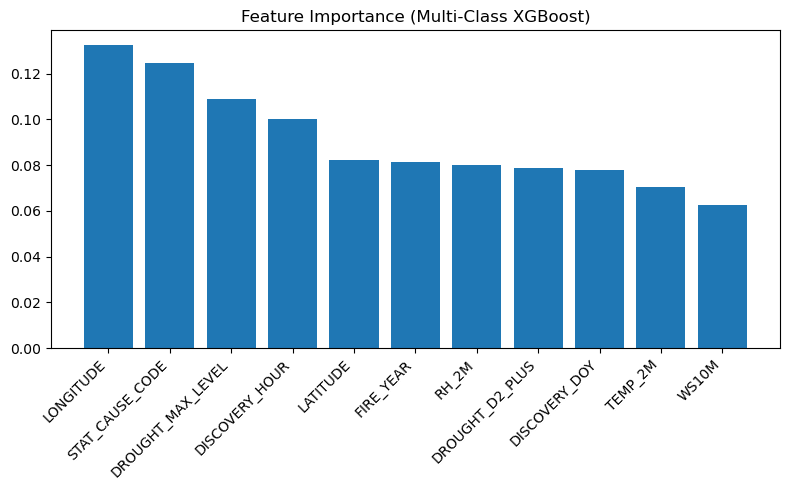

In [94]:
# Extract the fitted XGB model from pipeline
xgb_final = pipeline_mc.named_steps["model"]

import matplotlib.pyplot as plt

importances = xgb_final.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(feature_cols)), importances[indices])
plt.xticks(range(len(feature_cols)), np.array(feature_cols)[indices], rotation=45, ha="right")
plt.title("Feature Importance (Multi-Class XGBoost)")
plt.tight_layout()
plt.show()
